# Statistical Experiments and Significance Testing

The goal is to design an experiment in order to confirm or reject a hypothesis. Data Scientist often conducts continual experiments, particularly regarding user interface and product marketing.

Whenever you see references to statistical significance, t-tests, or p-values, it is typically in the context of the classical statistical inference “pipeline”. See below.

![Screen Shot 2024-09-23 at 9.07.22 AM.png](<attachment:Screen Shot 2024-09-23 at 9.07.22 AM.png>)

The term *inference* reflects the intention to apply the experiment results, which involve a limited set of data, to a larger process or population.

## Content
- **A/B Testing**
- **Hypothesis Tests**
- **Resampling**
    - Example: Web Stickiness
- **Statistical Significance and p-Values**
    - Table for ecommerce experiment results
- **t-Tests**
- **Multiple Testing**
- **ANOVA**
    - Plotting boxplots of the four webpages
    - Compute the permutation test (ANOVA)
- **F-Statistic**
- **Chi-Square Test**
    - Chi-Square Test: A Resampling Appproach
    - Compute permutation test (chi-square)
    - Chi-Square Test: Statistical Theory
    - Plotting chi-square distribution with different degrees of freedom
- **Fisher's Exact Test**
- **Multi-Arm Bandit**
- **Power and Sample Size**
    - Estimate how big a sample you will need
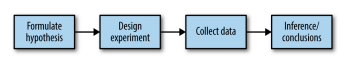

## A/B Testing
Important key terms: 
- **Treatment**
- **Treatment group**
- **Control group**
- **Randomization**
- **Subjects**
- **Test statistic**

A/B tests are common in web design and marketing, since results are so readily measured. Some examples of A/B testing include:

- Testing two soil treatments to determine which produces better seed germination
- Testing two therapies to determine which suppresses cancer more effectively
- Testing two prices to determine which yields more net profit
- Testing two web headlines to determine which produces more clicks
- Testing two web ads to determine which generates more conversions

A proper A/B test has subjects that can be assigned to one treatment or another. The subject might be a person, a plant seed, a web visitor; the key is that the subject is exposed to the treatment. Ideally, subjects are randomized (assigned randomly) to treatments. In this way, you know that any difference between the treatment groups is due to one of two things:

- The effect of the different treatments
- Luck of the draw in which subjects are assigned to which treatments (i.e., the random assignment may have resulted in the naturally better-performing subjects being concentrated in A or B)

You also need to pay attention to the test statistic or metric you use to compare group A to group B. Perhaps the most common metric in data science is a binary variable: click or no-click, buy or don’t buy, fraud or no fraud, and so on.

example:

|Outcome|Price A|Price B|
|-------|-------|-------|
|Conversion|200| 182|
|No conversion|23,539|22,406|

If the metric is a continuous variable (purchase amount, profit, etc.) or a count (e.g., days in hospital, pages visited), the result might be displayed differently. If one were interested not in conversion but in revenue per page view, the results of the price test in might look like this in typical default software output:

- Revenue/page view with price A: mean = 3.87, SD = 51.10
- Revenue/page view with price B: mean = 4.11, SD = 62.98

“SD” refers to the standard deviation of the values within each group. Note that it is difficult to sum up the variability of such data with a single number, though the mean absolute deviation from the mean (7.68 for A and 8.15 for B) is more reasonable than the standard deviation.

### Why Have a Control Group?

Without a control group, there is no assurance that “all other things are equal” and that any difference is really due to the treatment (or to chance). Think about blind studies and double blind studies.

A/B testing in data science is typically used in a web context. Treatments might be the design of a web page, the price of a product, the wording of a headline, or some other item. Some thought is required to preserve the principles of randomization. Typically the subject in the experiment is the web visitor, and the outcomes we are interested in measuring are clicks, purchases, visit duration, number of pages visited, whether a particular page is visited, and the like. 

**In a standard A/B experiment, you need to decide on one metric ahead of time.** Multiple behavior metrics might be collected and be of interest, but if the experiment is expected to lead to a decision between treatment A and treatment B, a single metric, or test statistic, needs to be established beforehand. Selecting a test statistic aer the experiment is conducted opens the door to researcher bias.

### Why Just A/B? Why Not C, D,…?

A/B tests are popular in the marketing and ecommerce worlds, but are far from the only type of statistical experiment. Additional treatments can be included. Subjects might have repeated measurements taken. Pharmaceutical trials where subjects are scarce, expensive, and acquired over time are sometimes designed with multiple opportunities to stop the experiment and reach a conclusion.

Data Scientist are less interested in the question:
- It the difference between price A and price B statistically significant?

than in the question:
- Which, out of multiple possible prices, is best?

For this, a relatively new type of experimental design is used: **the multi-arm bandit**

### Caution Story (Facebook):
In scientific and medical research involving human subjects, it is typically necessary to get their permission, as well as obtain the approval of an institutional review board. Experiments in business that are done as a part of ongoing operations almost never do this. In most cases (e.g., pricing experiments, or experiments about which headline to show or which offer should be made), this practice is widely accepted. Facebook, however, ran afoul of this general acceptance in 2014 when it experimented with the emotional tone in users’ newsfeeds. Facebook used sentiment analysis to classify newsfeed posts as positive or negative, and then altered the positive/negative balance in what it showed users. Some randomly selected users experienced more positive posts, while others experienced more negative posts. Facebook found that the users who experienced a more positive newsfeed were more likely to post positively themselves, and vice versa. The magnitude of the effect was small, however, and Facebook faced much criticism for conducting the experiment without users’ knowledge. Some users speculated that Facebook might have pushed some extremely depressed users over the edge if they got the negative version of their feed.

### Further Reading

Two-group comparisons (A/B tests) are a staple of traditional statistics, and just about any introductory statistics text will have extensive coverage of design principles and inference procedures. For a discussion that places A/B tests in more of a data science context and uses resampling, see *Introductory Statistics and Analytics: A Resampling Perspective* by Peter Bruce (Wiley, 2014).

## Hypothesis Tests

Hypothesis tests, also called *significance tests*, are ubiquitous in the traditional statistical analysis of published research. Their purpose is to help you learn whether random chance might be responsible for an observed effect.

Important key terms: 
- **Null hypothesis**
- **Alternative hypothesis**
- **One-way test**
- **Two-way test**

An A/B test is typically constructed with a hypothesis in mind. Why not just look at the outcome of the experiment and go with whichever treatment does better? 

- Failure to anticipate extreme events
- Misinterpret random events as having patterns of some significance. 


Recall the misinterpretation of randomness (50 written coin tosses vs. 50 real coin tosses)

In a properly designed A/B test, you collect data on treatments A and B in such a way that any observed difference between A and B must be due to either:

- Random chance in assignment of subjects
- A true difference between A and B

A statistical hypothesis test is further analysis of an A/B test, or any randomized experiment, to assess whether random chance is a reasonable explanation for the observed difference between groups A and B.

### The Null Hypothesis

Hypothesis tests use the following logic: “Given the human tendency to react to unusual but random behavior and interpret it as something meaningful and real, in our experiments we will require proof that the difference between groups is more extreme than what chance might reasonably produce.” This involves a baseline assumption that the treatments are equivalent, and any difference between the groups is due to chance. This baseline assumption is termed the null hypothesis. Our hope, then, is that we can in fact prove the null hypothesis wrong and show that the outcomes for groups A and B are more different than what chance might produce.

One way to do this is via a resampling permutation procedure, in which we shuffle together the results from groups A and B and then repeatedly deal out the data in groups of similar sizes, and then observe how often we get a difference as extreme as the observed difference. The combined shuffled results from groups A and B, and the procedure of resampling from them, embodies the null hypothesis of groups A and B being equivalent and interchangeable and is termed the null model. 

### Alternative Hypothesis

Hypothesis tests by their nature involve not just a null hypothesis but also an offsetting alternative hypothesis. Here are some examples:

- Null = “no difference between the means of group A and group B”; alternative =
“A is different from B” (could be bigger or smaller)
- Null = “A ≤ B”; alternative = “A > B”
- Null = “B is not X% greater than A”; alternative = “B is X% greater than A”

Taken together, the null and alternative hypotheses must account for all possibilities. The nature of the null hypothesis determines the structure of the hypothesis test.

### One-Way Versus Two-Way Hypothesis Tests

Note that one-tial vs. two-tail is a confusing subject, and not that relevant to data science, where the percision of p-value calculations is not terribly important.

## Resampling

Resampling in statistics means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. There are two main types of resampling procedures: the *bootstrap* and *permutation* tests. The bootstrap is used to assess the reliability of an estimate. Permutation tests are used to test hypotheses, typically involving two or more groups, and we discuss those in this section.

Important key terms: 
- **Permutation test** (see [visualization](https://www.jwilber.me/permutationtest/))
- **Resampling**
- **With or without replacement**

### Permutation Test

The permutation procedure is as follows:

1. Combine the results from the different groups into a single data set.
2. Shuffle the combined data and then randomly draw (without replacement) a resample of the same size as group A (clearly it will contain some data from the other groups).
3. From the remaining data, randomly draw (without replacement) a resample of
the same size as group B.
4. Do the same for groups C, D, and so on. You have now collected one set of
resamples that mirror the sizes of the original samples.
5. Whatever statistic or estimate was calculated for the original samples (e.g., differ‐
ence in group proportions), calculate it now for the resamples, and record; this
constitutes one permutation iteration.
6. Repeat the previous steps R times to yield a permutation distribution of the test
statistic.

Now go back to the observed difference between groups and compare it to the set of permuted differences. If the observed difference lies well within the set of permuted differences, then we have not proven anything—the observed difference is within the range of what chance might produce. However, if the observed difference lies outside most of the permutation distribution, then we conclude that chance is not responsible. In technical terms, the difference is statistically significant. 

### Example: Web Stickiness

Using a proxy variable a company decides to measure which two presentations does a better job selling this relatively high-value service. One potential proxy variable for our company is the number of clicks on the detailed landing page. A better on is how long people spend on the page (average session time), comparing page A to page B.
 
Note: Google Analytics cannot measure session time for the last session a person visits so it records it as a zero. Additional processiong to remove those sessions is required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power


%matplotlib inline

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
WEB_PAGE_DATA_CSV = DATA / 'web_page_data.csv'
FOUR_SESSIONS_CSV = DATA / 'four_sessions.csv'
CLICK_RATE_CSV = DATA / 'click_rates.csv'
IMANISHI_CSV = DATA / 'imanishi_data.csv'

In [4]:
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [5]:
session_times.Time = 100*session_times.Time 

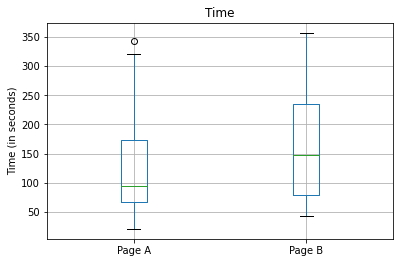

In [6]:
ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.show()

Note: page B leads to longer sessions than page A.

In [7]:
mean_a = session_times[session_times['Page'] == 'Page A']['Time'].mean()
mean_b = session_times[session_times['Page'] == 'Page B']['Time'].mean()
mean_b-mean_a

35.66666666666667

Page B has session times that are greater than those of page A by 35.67 seconds, on average. The question is whether this difference is within the range of what random chance might produce, i.e. is statistically significant. One way to answer this is with a permutation test

In [8]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

In [9]:
session_times['Page'].value_counts()

Page A    21
Page B    15
Name: Page, dtype: int64

In [11]:
nA = session_times[session_times['Page'] == 'Page A'].shape[0]
nB  = session_times[session_times['Page'] == 'Page B'].shape[0]
print(nA, nB)
print(perm_fun(session_times.Time, nA, nB))

21 15
13.38095238095238


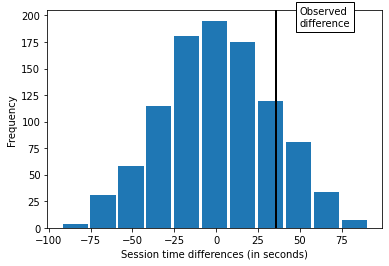

In [16]:
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots()
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=mean_b-mean_a, color='black', lw=2)
ax.text(50,190, 'Observed\ndifference', bbox={'facecolor': 'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')
plt.show()

The histogram shows that mean difference of random permutations often exceed the observed difference in session times. This happens approx. 12-15% of the time.

In [18]:
np.mean(perm_diffs > mean_b - mean_a)

0.151

Thus the observed difference in session time between page A and page B is well within the range of chance variation and thus is not statistically significant.

#### Exhaustive and Bootstrap Permutation Tests

In addition to the preceding random shuffling procedure, also called a random permutation test or a randomization test, there are two variants of the permutation test:

- An *exhaustive permutation test*
- A *bootstrap permutation test*

Both procedures are encountered in statistics, and the distinction between them is somewhat convoluted and not of consequence in the practice of data science.

#### Permutation Tests: The Bottom Line for Data Science

Permutation tests are useful heuristic procedures for exploring the role of random variation. They are relatively easy to code, interpret, and explain, and they offer a useful detour around the formalism and “false determinism” of formula-based statistics, in which the precision of formula “answers” tends to imply unwarranted certainty.

One virtue of resampling, in contrast to formula approaches, is that it comes much closer to a one-size-fits-all approach to inference. Data can be numeric or binary. Sample sizes can be the same or different. Assumptions about normally distributed data are not needed.

## Statistical Significance and p-Values
Important key terms: 
- **p-value** (probability of obtaining results as unusual or extreme as the observed results)
- **Alpha**
- **Type 1 error**
- **Type 2 error**

### Table for ecommerce experiment results

|Outcome|Price A|Price B|
|---|---|---|
|Conversion|200|182|
|No Conversion|23,539|22,406|

Price A converts almost 5% better than price B. Note that it's tempting to consider this 'big data' with 45000 data points (significance testing is needed only to account for sampling variability in small samples) but the value of interest only has hundreds of data points. So we can ask if the two prices share the same conversion rate, could chance variation produce a difference as big as 5%?

1. Put cards labeled 1 and 0 in a box: this represents the supposed shared conversion rate of 382 ones and 45,945 zeros = 0.008246 = 0.8246%.
2. Shuffle and draw out a resample of size 23,739 (same n as price A), and record how many 1s.
3. Record the number of 1s in the remaining 22,588 (same n as price B).
4. Record the difference in proportion of 1s.
5. Repeat steps 2–4.
6. How often was the difference >= 0.0368?

Observed difference: 0.0368%


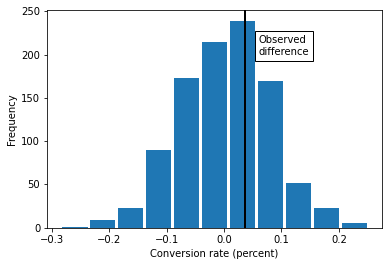

In [19]:
obs_pct_diff = 100*(200/(23539+200)-182/(22406+182))
print('Observed difference: {:.4f}%'.format(obs_pct_diff))
conversion = [0]*(23593+22406)
conversion.extend([1]*(200+182))
conversion = pd.Series(conversion)

perm_diffs = [100*perm_fun(conversion, 23539+200, 22406+182) for _ in range(1000)]
fig, ax = plt.subplots()
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(.06,200, 'Observed\ndifference', bbox={'facecolor': 'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')
plt.show()

### p-Value

Simply looking at the graph is not a very precise way to measure statistical significance, so of more interest is the p-value. This is the frequency with which the chance model produces a result more extreme than the observed result. We can estimate a pvalue from our permutation test by taking the proportion of times that the permutation test produces a difference equal to or greater than the observed difference:

In [20]:
# p-value
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.322

Note that we didn't need to use a permutation test to get a p-value. We have binomial distribution, we can approximate the p-value

In [21]:
survivors = np.array([[200, 23593], [182, 22406]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)
print('p-value for single sided test: {:.4f}'.format(p_value/2))

p-value for single sided test: 0.3581



### Alpha

Statisticians frown on the practice of leaving it to the researcher’s discretion to determine whether a result is “too unusual” to happen by chance. Rather, a threshold is specified in advance, as in “more extreme than 5% of the chance (null hypothesis) results”; this threshold is known as alpha. Typical alpha levels are 5% and 1%. 

What the p-value actually represents is: given a chance model, results as extreme as the observed result could occur. 

##### p-value controversy

In March 2016, the American Statistical Association, after much internal deliberation, revealed the extent of misunderstanding about p-values when it issued a cautionary statement regarding their use. The ASA statement stressed six principles for researchers and journal editors:

1. P-values can indicate how incompatible the data are with a specified statistical model.
2. P-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.
3. Scientific conclusions and business or policy decisions should not be based only on whether a p-value passes a specific threshold.
4. Proper inference requires full reporting and transparency.
5. A p-value, or statistical significance, does not measure the size of an effect or the importance of a result.
6. By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis.

##### Practical signicance

Even if a result is statistically significant, that does not mean it has practical significance. A small difference that has no practical meaning can be statistically significant if it arose from large enough samples. Large samples ensure that small, nonmeaningful effects can nonetheless be big enough to rule out chance as an explanation. Ruling out chance does not magically render important a result that is, in its
essence, unimportant.

### Type 1, Type 2 Errors, Data Science, and p-Values

In assessing statistical significance, two types of error are possible:

- A Type 1 error, in which you mistakenly conclude an effect is real, when it is really just due to chance
- A Type 2 error, in which you mistakenly conclude that an effect is not real (i.e., due to chance), when it actually is real

Actually, a Type 2 error is not so much an error as a judgment that the sample size is too small to detect the effect. 

Significance tests are typically structured to minimize Type 1 errors. For Data Science p-value is a decision tool in an experiment, merely another point of information bearing on a decision. For example, p-values are sometimes used as intermediate inputs in some statisitcal or machine learning models - a feature might be included in or excluded from a model depending on its p-value.

## t-Tests
Important key terms: 
- **Test statistic** 
- **t-statistic**
- **t-distribution**

All significance tests require that you specify a test statistic to measure the effect you are interested in and help you determine whether that observed effect lies within the range of normal chance variation. A good approximation to the permutation distribution was the t-test. It is used for the very common two-sample comparison-A/B test-in which the data is numeric.

In the 1920s and 1930s, when statistical hypothesis testing was being developed, it was not feasible to randomly shuffle data thousands of times to do a resampling test. Statisticians found that a good approximation to the permutation (shuffled) distribution was the t-test, based on Gosset’s t-distribution. It is used for the very common two-sample comparison—A/B test—in which the data is numeric. But in order for the t-distribution to be used without regard to scale, a standardized form of the test statistic must be used.

In [23]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print('p-value for single sided test: {:.4f}'.format(res.pvalue/2))

p-value for single sided test: 0.1408


The alternative hypothesis is that the session time mean for page A is less than that for page B. The p-value of .1408 is fairly close to the permutation test p-values.

## Multiple Testing
Important key terms: 
- **Type 1 error** 
- **False discorvery rate**
- **Alpha inflation** (1-probability of that all will be nonsignificant)
- **Adjustment of p-values**
- **Overfitting**

Given 20 predictors and 1 outcome, all randomly generated, the odd are pretty good that at least one predictor will (falsely) turn out to be statistically significant if you do a series of 20 significance tests at an alpha level = .05 level (type 1 error).

This issue is related to the problem of overfitting in data mining, or “fitting the model to the noise.”The more variables you add, or the more models you run, the greater the probability that something will emerge as “significant” just by chance.

### Degrees of Freedom
Important key terms:
- **n or sample size**
- **Degrees of freedom.**

When you use a sample to estimate the variance for a population, you will end up with an estimate that is slightly biased downward if you use n in the denominator. If you use n – 1 in the denominator, the estimate will be free of that bias.

#### Further Reading
There are [several web tutorials on degrees of freedom](https://oreil.ly/VJyts).

## ANOVA

Suppose that, instead of an A/B test, we had a comparison of multiple groups, say A/B/C/D, each with numeric data. The statistical procedure that tests for a statistically significant difference among the groups is called analysis of variance, or ANOVA.

Important key terms: 
- **Pairwise comparison** 
- **Omnibus test**
- **Decomposition of variance**
- **F-statistic**
- **SS**(Sum of squares)

The statistical procedure that tests for a statistically significant difference among the group is called analysis of variance (ANOVA).

In [55]:
four_sessions = pd.read_csv(FOUR_SESSIONS_CSV)
four_sessions.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


### Plotting boxplots of the four webpages

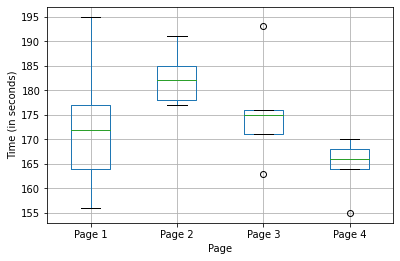

In [68]:
ax = four_sessions.boxplot(by='Page', column='Time')
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')
plt.show()

The procedure used to test this is ANOVA. The basis for it can be seen in the following resampling procedure (specified here for the A/B/C/D test of web page stickiness):

1. Combine all the data together in a single box.
2. Shuffle and draw out four resamples of five values each.
3. Record the mean of each of the four groups.
4. Record the variance among the four group means.
5. Repeat steps 2–4 many (say, 1,000) times.

What proportion of the time did the resampled variance exceed the observed variance? This is the p-value.

### Compute the permutation test (ANOVA)

In [19]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means: ', four_sessions.groupby('Page').mean().values.ravel())
print('Variance: ', observed_variance)

Observed means:  [172.8 182.6 175.6 164.6]
Variance:  55.426666666666655


In [20]:
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]

In [21]:
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

Pr(Prob) 0.07933333333333334


The p-value, given by Pr(Prob) is .08. In other words, given the same underlying stickiness, 8% of the time the response rate among four pages might differ as much as was actually observed, just by chance. This degree of improbability falls short of the traditional statistical threshold of 5%, so we conclude that the difference among the four pages could have arisen by chance.

## F-Statistic
Just like the t-test can be used instead of a permutation test for comparing the mean of two groups, there is a statistical test for ANOVA based on the *F-statistic*. The F-statistic is based on the ratio of the variance across group means to the variance due to residual error. The higher the ratio, the more statistically significant the result.  If the data follows a normal distribution, then statistical theory dictates that the statistic should have a certain distribution. Based on this, it is possible to compute a p-value

In [69]:
model = smf.ols('Time ~ Page', data=four_sessions).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


#### Two-Way ANOVA

The A/B/C/D test just described is a “one-way” ANOVA, in which we have one factor (group) that is varying. We could have a second factor involved—say, “weekend versus weekday”—with data collected on each combination (group A weekend, group A weekday, group B weekend, etc.). This would be a “two-way ANOVA,” and we would handle it in similar fashion to the one-way ANOVA by identifying the “interaction effect.” After identifying the grand average effect and the treatment effect, we then separate the weekend and weekday observations for each group and find the difference between the averages for those subsets and the treatment average.

You can see that ANOVA and then two-way ANOVA are the first steps on the road toward a full statistical model, such as regression and logistic regression, in which multiple factors and their effects can be modeled.

## Chi-Square Test

Web testing often goes beyond A/B testing and tests multiple treatments at once. The chi-square test is used with count data to test how well it fits some expected distribution. The most common use of the chi-square statistic in statistical practice is with r ×c contingency tables, to assess whether the null hypothesis of independence among variables is reasonable.

Important key terms: 
- **Chi-square statistic** 
- **Expectation or expected**

This chi-square test is used with count data to test how well it fits some expected distribution

### Chi-Square Test: A Resampling Appproach

Suppose you are testing three different headlines—A, B, and C—and you run them each on 1,000 visitors, with the results shown below.

In [83]:
clicks = pd.read_csv(CLICK_RATE_CSV)
clicks = clicks.pivot(index='Click', columns='Headline', values='Rate')
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


Headline A returns nearly twice the click rate of B. The actual numbers are small, though. A resampling procedure can test whether the click rates differ to an extent greater than chance might cause. For this test, we need to have the “expected” distribution of clicks, and in this case, that would be under the null hypothesis assumption that all three headlines share the same click rate, for an overall click rate of $\frac{34}{3000}$. Under this assumption, our contingency table would look like below.

In [104]:
row_average = clicks.mean(axis=1)
expected_clicks_nonclicks = pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
})
expected_clicks_nonclicks

,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


The *Pearson residual* is defined as:
$$
R =\frac{\text{Observed}-\text{Expected}}{\sqrt{\text{Expected}}}
$$
$R$ measures the extent to which the actual counts differ from these expected counts

In [116]:
r_df = round((clicks - expected_clicks_nonclicks)/np.sqrt(expected_clicks_nonclicks),3)
r_df

Headline,Headline A,Headline B,Headline C
Click,,,
Click,0.792,-0.990,0.198
No-click,-0.085,0.106,-0.021


The chi-square statistic is defined as the sum of the squared Pearson residuals:
$$
X = \sum_t^r\sum_j^c r_{t,j}^2
$$

with 
$$
r = \begin{bmatrix}
0.792 & -0.990 & 0.198
\\
-0.085	 & 0.106 & -0.021
\end{bmatrix}_{(r,c)=(2,3)}
$$

In [117]:
chi_square_statistic = (r_df*r_df).sum().sum()
round(chi_square_statistic,3)

1.665

The chi-square statistic for this example is 1.664. Is that more than could reasonably occur in a chance
model? We can test with this resampling algorithm:

1. Constitute a box with 34 ones (clicks) and 2,966 zeros (no clicks).
2. Shuffle, take three separate samples of 1,000, and count the clicks in each.
3. Find the squared differences between the shuffled counts and the expected counts and sum them.
4. Repeat steps 2 and 3, say, 1,000 times.
5. How often does the resampled sum of squared deviations exceed the observed? That’s the p-value.

### Compute Permutation Test (Chi-Square)

In [118]:
box = [1]*34
box.extend([0]*2966)
random.shuffle(box)

In [119]:
def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect)**2 / expect
                                  for observe in row])

    return np.sum(pearson_residuals)

In [120]:
expected_clicks = 34/3
expected_nonclicks = 1000-expected_clicks
expected = [expected_clicks, expected_nonclicks]
chi2observed = chi2(clicks.values, expected)
chi2observed

1.6659394708658917

In [121]:
def perm_fun(box):
    random.shuffle(box)
    sample_clicks = [sum(box[0:1000]),
                     sum(box[1000:2000]),
                     sum(box[2000:3000])]
    sample_nonclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_nonclicks], expected)

In [122]:
perm_chi2 = [perm_fun(box) for _ in range(2000)]
resampled_p_value = sum([val > chi2observed for val in perm_chi2]) / len(perm_chi2)
print('Observed chi2: {:.4f}'.format(chi2observed))
print('Resampled p-value: {:.4f}'.format(resampled_p_value))

Observed chi2: 1.6659
Resampled p-value: 0.4675


### Chi-Square Test: Statistical Theory

Asymptotic statistical theory shows that the distribution of the chi-square statistic can be approximated by a chi-square distribution. The appropriate standard chi-square distribution is determined by the degrees of freedom. For a contingency table, the degrees of freedom are related to the number of rows (r) and columns (c) as follows:

$$
\text{degrees of freedom} = (r-1)\times(c-1)
$$

In [123]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print('Observed chi2: {:.4f}'.format(chi2observed))
print('p-value: {:.4f}'.format(pvalue))

Observed chi2: 1.6659
p-value: 0.4348


The p-value is a bit less than the resampling p-value: **this is because the chi-square distribution is only an approximation of the actual distribution of the statistic.**

The chi-square distribution is typically skewed, with a long tail to the right; see below for the distribution with 1, 2, 5, and 20 degrees of freedom. The further out on the chi-square distribution the observed statistic is, the lower the p-value.

### Plotting Chi-Square Distribution With Different Degrees Of Freedom

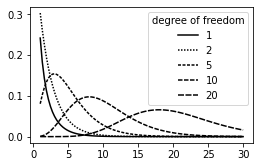

In [125]:
x = [1 + i * (30 - 1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x': x,
    'chi_1': stats.chi2.pdf(x, df=1),
    'chi_2': stats.chi2.pdf(x, df=2),
    'chi_5': stats.chi2.pdf(x, df=5),
    'chi_10': stats.chi2.pdf(x, df=10),
    'chi_20': stats.chi2.pdf(x, df=20),
})
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(chi.x, chi.chi_1, color='black', linestyle='-', label='1')
ax.plot(chi.x, chi.chi_2, color='black', linestyle=(0, (1, 1)), label='2')
ax.plot(chi.x, chi.chi_5, color='black', linestyle=(0, (2, 1)), label='5')
ax.plot(chi.x, chi.chi_10, color='black', linestyle=(0, (3, 1)), label='10')
ax.plot(chi.x, chi.chi_20, color='black', linestyle=(0, (4, 1)), label='20')
ax.legend(title='degree of freedom')

plt.show()

## Fisher's Exact Test

The chi-square distribution is a good approximation of the shuffled resampling test, except when counts are extremely low (single digits < 5). The resampling procedure will yield more accurate p-values. In fact, most statistical software has a procedure to actually enumerate all the possible rearrangements that can occur, tabulate their frequencies, and determine exactly how extreme the observed result is. This is called **Fisher's exact test**.

**Caution**:

Scipy has only an implementation of Fisher's Exact test for 2x2 matrices. There is a github repository that provides a Python implementation that uses the same code as the R version. Installing this requires a Fortran compiler.

### Detecting Scientic Fraud

An interesting example is provided by the case of Tufts University researcher Thereza Imanishi-Kari, who was accused in 1991 of fabricating data in her research. Congressman John Dingell became involved, and the case eventually led to the resignation of her colleague, David Baltimore, from the presidency of Rockefeller University.

One element in the case rested on statistical evidence regarding the expected distribution of digits in her laboratory data, where each observation had many digits. Investigators focused on the interior digits (ignoring the first digit and last digit of a number), which would be expected to follow a uniform random distribution. That is, they would occur randomly, with each digit having equal probability of occurring (the lead digit might be predominantly one value, and the final digits might be affected by rounding).

In [134]:
imanishi = pd.read_csv(IMANISHI_CSV)
imanishi.set_index('Digit')

,Frequency
Digit,
0,14
1,71
2,7
3,65
4,23
5,19
6,12
7,45
8,53


The distribution of the 315 digits, shown above, certainly looks nonrandom.

Investigators calculated the departure from expectation (31.5—that’s how often each digit would occur in a strictly uniform distribution) and used a chi-square test (a resampling procedure could equally have been used) to show that the actual distribution was well beyond the range of normal chance variation, indicating the data might have been fabricated. (Note: Imanishi-Kari was ultimately exonerated after a lengthy proceeding.)

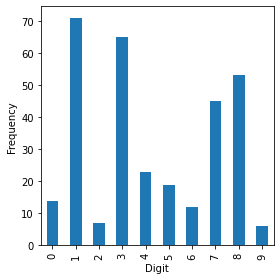

In [135]:
imanishi = pd.read_csv(IMANISHI_CSV)
imanishi.columns = [c.strip() for c in imanishi.columns]
ax = imanishi.plot.bar(x='Digit', y=['Frequency'], legend=False,
                      figsize=(4, 4))
ax.set_xlabel('Digit')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Relevance for Data Science

In most data science experiments, whether A/B or A/B/C…, the goal is not simply to establish statistical significance but rather to arrive at the best treatment.

One data science application of the chi-square test, especially Fisher’s exact version, is in determining appropriate sample sizes for web experiments. These experiments often have very low click rates, and despite thousands of exposures, count rates might be too small to yield definitive conclusions in an experiment. In such cases, Fisher’s exact test, the chi-square test, and other tests can be useful as a component of power
and sample size calculations.

Chi-square tests are used widely in research by investigators in search of the elusive statistically significant p-value that will allow publication. Chi-square tests, or similar resampling simulations, are used in data science applications more as a filter to determine whether an effect or a feature is worthy of further consideration than as a formal test of significance. 

For example, they are used in spatial statistics and mapping to determine whether spatial data conforms to a specified null distribution (e.g., are crimes concentrated in a certain area to a greater degree than random chance would allow?). They can also be used in automated feature selection in machine learning, to assess class prevalence across features and identify features where the prevalence of a certain class is unusually high or low, in a way that is not compatible with random variation.

## Multi-Arm Bandit

Multi-arm bandits offer an approach to testing, especially web testing, that allows explicit optimization and more rapid decision making than the traditional statistical approach to designing experiments.

Important key terms: 
- **Multi-arm bandit** 
- **Arm** (Treatment)
- **Win** (e.g. customer clicks on the link)

A traditional A/B test involves data collected in an experiment, according to a specified design, to answer a specific question such as, “Which is better, treatment A or treatment B?” The presumption is that once we get an answer to that question, the experimenting is over and we proceed to act on the results.

You can probably perceive several difficulties with that approach:
- First, our answer may be inconclusive: “effect not proven.” In other words, the results from the experiment may suggest an effect, but if there is an effect, we don’t have a big enough sample to prove it (to the satisfaction of the traditional statistical standards). 
- Second, we might want to begin taking advantage of results that
come in prior to the conclusion of the experiment.
- Third, we might want the right to change our minds or to try something different based on additional data that comes in after the experiment is over.

Data science (and business in general) is not so worried about statistical significance, but con‐
cerned more with optimizing overall effort and results. Bandit algorithms, which are very popular in web testing, allow you to test multiple treatments at once and reach conclusions faster than traditional statistical designs.

Bandit algorithms, which are very popular in web testing, allow you to test multiple treatments at once and reach conclusions faster than traditional statistical designs.

## Power and Sample Size
Important key terms: 
- **Effect size** 
- **Power**
- **Significance level**

The most common use of power calculations is to estimate how big a sample you will need.

### Estimate how big a sample you will need

In [32]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 116602.393


In [33]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 5488.408
